Treasure Door, 1000000 essais
Probabilities:  [0.25 0.   0.   0.25 0.25 0.   0.   0.25]
{'α': 250054, 'β': 0, 'γ': 0, 'δ': 249491, 'ε': 250129, 'ζ': 0, 'η': 0, 'θ': 250326}


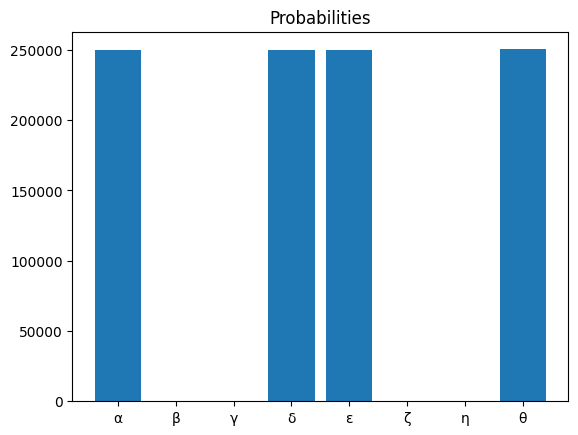





Monty Hall, 1000000 essais
Probabilities:  [0.         0.         0.33333333 0.         0.16666667 0.
 0.         0.         0.         0.33333333 0.         0.
 0.16666667 0.         0.         0.        ]
{'α': 0, 'β': 0, 'γ': 333268, 'δ': 0, 'ε': 166258, 'ζ': 0, 'η': 0, 'θ': 0, 'α1': 0, 'β1': 333529, 'γ1': 0, 'δ1': 0, 'ε1': 166945, 'ζ1': 0, 'η1': 0, 'θ1': 0}


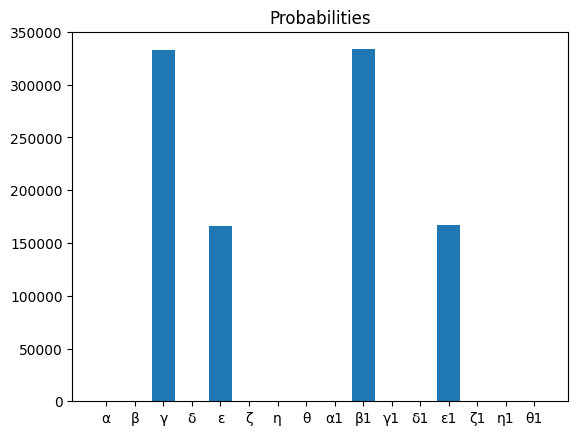

In [1]:
import numpy as np
from functools import wraps
import traceback
import sys
from matplotlib import pyplot as plt
import math  
NEGATE_THE_NUMBER = -1
RY_GATE_ANGLE_MONTY_HALL = 2*math.acos(1/math.sqrt(3))
UN_SUR_RACINE_DE_DEUX = 1/math.sqrt(2)

def normalProductOnDoors(circuit1 :np.ndarray, circuit2: np.ndarray) -> np.ndarray:
    try:
        return circuit1 @ circuit2
    except Exception as e:
        print("Problème avec normalProductOnDoors")
        # traceback.print_exc()
        sys.exit(1)

def tensorProductOnDoors(circuit1 :np.ndarray, circuit2: np.ndarray) -> np.ndarray:
    try:
        return np.kron(circuit1, circuit2)
    except Exception as e:
        print("Problème avec tensorProductOnDoors")
        # traceback.print_exc()
        sys.exit(1)   

def ry_gate_function(θ: float) -> np.ndarray:
    return np.array([[math.cos(θ/2), (math.sin(θ/2)*NEGATE_THE_NUMBER)],\
                    [math.sin(θ/2), math.cos(θ/2)]])

#TODO
#Fonction qui ajoute une version contrôlé d'une porte quantique (argument1: circuit||Porte)

#TODO
#Fonction qui réorganise les qubits d'une porte quantique (argument1: porte, argument2: ordre des qubits)


#Définition d'un classe pour les opérations courantes
#---------------------------------------------------------------------------------------------
class QuantumOperations:
    init_state = None

    # S'assurer que l'état initital n'est pas autre chose qu'une np.ndarray()
    def np_ndarray_required(f):
        @wraps(f)
        def decorated(*args, **kwargs):
            if not isinstance(args[1], np.ndarray):
                print("utilisez numpy pour créer un état initial")
                sys.exit(1)
            return f(*args, **kwargs)
        return decorated

    @np_ndarray_required
    def __init__(self, _init_state: np.ndarray) -> np.ndarray:
        try:
            self.init_state = _init_state.T
        except Exception as e:
            print("Problème avec constructeur de QuantumOperations")
            # traceback.print_exc()
            sys.exit(1)

    def tensorProductOnSelfAsCircuit1(self, circuit2: np.ndarray) -> np.ndarray:
        try:
            return np.kron(circuit2, self.init_state)
        except Exception as e:
            print("Problème avec tensorProductOnSelfAsCircuit1")
            # traceback.print_exc()
            sys.exit(1)

    def tensorProductOnSelfAsCircuit2(self, circuit1: np.ndarray) -> np.ndarray:
        try:
            return np.kron(self.init_state, circuit1)
        except Exception as e:
            print("Problème avec tensorProductOnSelfAsCircuit2")
            # traceback.print_exc()
            sys.exit(1)

    def normalProductOnSelfAsCircuit1(self, circuit2: np.ndarray) -> np.ndarray:
        try:
            return circuit2 @ self.init_state
        except Exception as e:
            print("Problème avec normalProductOnSelfAsCircuit1")
            traceback.print_exc()
            sys.exit(1)

    def normalProductOnSelfAsCircuit2(self, circuit1: np.ndarray) -> np.ndarray:
        try:
            return self.init_state @ circuit1
        except Exception as e:
            print("Problème avec normalProductOnSelfAsCircuit2")
            # traceback.print_exc()
            sys.exit(1)

    def getProbabilitiesOfInitState(self):
        try:
            print("Probabilities: ",(self.init_state * np.conjugate(self.init_state)))
            return self.init_state * np.conjugate(self.init_state)
        except Exception as e:
            print("Problème avec getProbabilitiesOfInitState")
            # traceback.print_exc()
            sys.exit(1)
    
    # TODO Verifier le nombre de qubits avec un décorateur avant la fonction
    def sample_state_3qubits(self, shots: int) -> dict:
        probabilities  = self.getProbabilitiesOfInitState()
        components = ["α", "β", "γ", "δ", "ε", "ζ", "η", "θ"]
        results = np.random.choice(components, shots, p=probabilities)
        index = 0
        dictOfResults = dict()
        dictOfResults["α"] = 0
        dictOfResults["β"] = 0
        dictOfResults["γ"] = 0
        dictOfResults["δ"] = 0
        dictOfResults["ε"] = 0
        dictOfResults["ζ"] = 0
        dictOfResults["η"] = 0
        dictOfResults["θ"] = 0
        while index < results.size:
          if results[index] == "α":
              dictOfResults["α"]+=1
          elif results[index] == "β":
              dictOfResults["β"]+=1
          elif results[index] == "γ":
              dictOfResults["γ"]+=1
          elif results[index] == "δ":
              dictOfResults["δ"]+=1
          elif results[index] == "ε":
              dictOfResults["ε"]+=1        
          elif results[index] == "ζ":
              dictOfResults["ζ"]+=1
          elif results[index] == "η":
              dictOfResults["η"]+=1
          elif results[index] == "θ":
              dictOfResults["θ"]+=1
          else:
              print("une erreur s'est produite au moment de compiler les résultats")
          index+=1
        return dictOfResults

    # TODO Verifier le nombre de qubits avec un décorateur avant la fonction
    def sample_state_4qubits(self, shots: int) -> dict:
        probabilities  = self.getProbabilitiesOfInitState()
        components = ["α", "β", "γ", "δ", "ε", "ζ", "η", "θ", "α1", "β1", "γ1", "δ1", "ε1", "ζ1", "η1", "θ1"]
        results = np.random.choice(components, shots, p=probabilities)
        index = 0
        dictOfResults = dict()
        dictOfResults["α"] = 0
        dictOfResults["β"] = 0
        dictOfResults["γ"] = 0
        dictOfResults["δ"] = 0
        dictOfResults["ε"] = 0
        dictOfResults["ζ"] = 0
        dictOfResults["η"] = 0
        dictOfResults["θ"] = 0
        dictOfResults["α1"] = 0
        dictOfResults["β1"] = 0
        dictOfResults["γ1"] = 0
        dictOfResults["δ1"] = 0
        dictOfResults["ε1"] = 0
        dictOfResults["ζ1"] = 0
        dictOfResults["η1"] = 0
        dictOfResults["θ1"] = 0
        while index < results.size:
          if results[index] == "α":
              dictOfResults["α"]+=1
          elif results[index] == "β":
              dictOfResults["β"]+=1
          elif results[index] == "γ":
              dictOfResults["γ"]+=1
          elif results[index] == "δ":
              dictOfResults["δ"]+=1
          elif results[index] == "ε":
              dictOfResults["ε"]+=1        
          elif results[index] == "ζ":
              dictOfResults["ζ"]+=1
          elif results[index] == "η":
              dictOfResults["η"]+=1
          elif results[index] == "θ":
              dictOfResults["θ"]+=1
          elif results[index] == "α1":
              dictOfResults["α1"]+=1
          elif results[index] == "β1":
              dictOfResults["β1"]+=1
          elif results[index] == "γ1":
              dictOfResults["γ1"]+=1
          elif results[index] == "δ1":
              dictOfResults["δ1"]+=1
          elif results[index] == "ε1":
              dictOfResults["ε1"]+=1        
          elif results[index] == "ζ1":
              dictOfResults["ζ1"]+=1
          elif results[index] == "η1":
              dictOfResults["η1"]+=1
          elif results[index] == "θ1":
              dictOfResults["θ1"]+=1
          else:
              print("une erreur s'est produite au moment de compiler les résultats")
          index+=1
        return dictOfResults
    
    def show(self, _dictOfResults: dict):
        print(_dictOfResults)
        plt.title("Probabilities") 
        plt.bar(*zip(*_dictOfResults.items()))
        plt.show()
        print("\n\n\n")


# Fin Class QuantumOperations ----------------------------------------------------------------
#----------------------------------------------------------------------------------------------
# Application principale
if __name__== "__main__":
    # Définitions des portes quantiques
    i_gate = np.array([[1,0],[0,1]])
    x_gate = np.array([[0,1],[1,0]])
    h_gate = np.sqrt(0.5) * np.array([[1,1],[1,-1]])
    ih_gate = tensorProductOnDoors(i_gate, h_gate)
    xi_gate = tensorProductOnDoors(x_gate, i_gate)
    xii_gate = tensorProductOnDoors(xi_gate, i_gate)
    cx_gate = np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])
    xc_gate = np.array([[1,0,0,0],[0,0,0,1],[0,0,1,0],[0,1,0,0]])
    hc_gate = np.array([[1,0,0,0],[0, UN_SUR_RACINE_DE_DEUX, 0, UN_SUR_RACINE_DE_DEUX],\
                        [0,0,1,0],[0, UN_SUR_RACINE_DE_DEUX, 0, UN_SUR_RACINE_DE_DEUX*NEGATE_THE_NUMBER]])
    # Cette porte aurait pu être calculée avec les fonctions TODO plus haut, (help)
    xiic_gate = np.array([[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],\
                        [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],\
                        [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],\
                        [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],\
                        [0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],\
                        [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0],\
                        [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],\
                        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],\
                        [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],\
                        [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],\
                        [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],\
                        [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],\
                        [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],\
                        [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],\
                        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],\
                        [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0]])
    swap_gate = normalProductOnDoors(normalProductOnDoors(xc_gate, cx_gate), xc_gate)
    xx_gate = tensorProductOnDoors(x_gate, x_gate)
    # |ψ⟩ = α |000⟩ + β |001⟩ + γ |010⟩ + δ |011⟩ + ε |100⟩ + ζ |101⟩ + η |110⟩ + θ |111⟩ .
    cix_gate = np.array([[1,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0],[0,0,1,0,0,0,0,0],[0,0,0,1,0,0,0,0],[0,0,0,0,0,1,0,0],[0,0,0,0,1,0,0,0],[0,0,0,0,0,0,0,1],[0,0,0,0,0,0,1,0]])
# Premier circuit, la porte du trésor
    #Création objet et état initial
    treasure_door = QuantumOperations(np.array([1,0,0,0,0,0,0,0]))
    b_circuit = normalProductOnDoors(xc_gate, ih_gate)
    circuit_1er_palier = tensorProductOnDoors(h_gate, b_circuit)
    # Premier palier produit avec l'état initial
    treasure_door.init_state = treasure_door.normalProductOnSelfAsCircuit1(circuit_1er_palier)
#----------------------------------------------------------------------------------------------------------
# Deuxieme palier
    xi_cx_circuit = normalProductOnDoors(xi_gate, cx_gate)
    xi_cx_i_gate = tensorProductOnDoors(xi_cx_circuit, i_gate)
    cix__xi_cx_i_circuit = normalProductOnDoors(cix_gate, xi_cx_i_gate)
    circuit_2e_palier = normalProductOnDoors(xii_gate, cix__xi_cx_i_circuit)
    treasure_door.init_state = treasure_door.normalProductOnSelfAsCircuit1(circuit_2e_palier)
# Troisieme palier
    circuit_3e_Palier = tensorProductOnDoors(i_gate, normalProductOnDoors(xx_gate, swap_gate))
    treasure_door.init_state = treasure_door.normalProductOnSelfAsCircuit1(circuit_3e_Palier)
# Quatrième et dernier palier
    treasure_door.init_state = normalProductOnDoors(treasure_door.init_state, circuit_2e_palier)
# Start counts for treasure door-----------------------------------------------------------------------------
    print("Treasure Door, 1000000 essais")
    treasure_door.show(treasure_door.sample_state_3qubits(1000000))

# Start Monty Hall--------------------------------------------------------------------------------------------
    ry_gate = ry_gate_function(RY_GATE_ANGLE_MONTY_HALL)
    i_ry_gate = tensorProductOnDoors(i_gate, ry_gate)
    hc__i_ry_circuit = normalProductOnDoors(hc_gate, i_ry_gate)
    monty_hall = QuantumOperations(np.array([1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]))
    # Tensored gates (prepared for first part) to apply on initial state
    i_hc__i_ry_gate = tensorProductOnDoors(i_gate, hc__i_ry_circuit)
    xc_i_gate = tensorProductOnDoors(xc_gate, i_gate)
    i_xc_gate = tensorProductOnDoors(i_gate, xc_gate)
    i_i_x_gate = tensorProductOnDoors(i_gate, tensorProductOnDoors(i_gate, x_gate))
    # Monter la première partie du circuit sur quatre qubits
    monty_hall_first_circuit = normalProductOnDoors(normalProductOnDoors(normalProductOnDoors(i_i_x_gate,\
                                        i_xc_gate), xc_i_gate), i_hc__i_ry_gate)
    # Monter monty_hall_first_circuit sur 4 qubits
    monty_hall_first_circuit_on_4qubits = tensorProductOnDoors(i_gate, monty_hall_first_circuit)
#----------------------------------------------------------------------------------------------------------------------------
    # Monty Hall second circuit
    hcii_gate = tensorProductOnDoors(tensorProductOnDoors(hc_gate, i_gate), i_gate)
    monty_hall_second_circuit = normalProductOnDoors(hcii_gate, xiic_gate)
    # Monty hall circuit
    monty_hall_circuit = normalProductOnDoors(monty_hall_second_circuit, monty_hall_first_circuit_on_4qubits)
    # Monty hall results
    monty_hall.init_state = monty_hall.normalProductOnSelfAsCircuit1(monty_hall_circuit)
    print("Monty Hall, 1000000 essais")
    monty_hall.show(monty_hall.sample_state_4qubits(1000000))






